# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [15]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient

analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

load_dotenv()

True

In [16]:
# Read your api key environment variable
api_key = os.getenv("news_api")
print(api_key)

8cdf5453d1c840e0a2813d943b1583fe


In [17]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [18]:
#Creating a dataframe from the articles 
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [19]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin AND BTC AND Bitcoin AND btc", 
    language='en'
)

# Show the total number of news
bitcoin_news["totalResults"]

#Create Bitcoin Dataframe
bitcoin_news_df = create_df(bitcoin_news['articles'], 'en')
bitcoin_news_df

,title,description,text,date,language
0,"You can now buy a Tesla with Bitcoin, Elon Mus...",The inevitable has happened: You can now purch...,The inevitable has happened: You can now purch...,2021-03-24,en
1,"Six (6) Reasons Why Bitcoin Will Hit $90,000 T...",Here are six more reasons why BTC is going to ...,This story originally appeared on MarketBeatAs...,2021-04-01,en
2,What is bitcoin? Why the digital currency beca...,"BITCOIN ($ BTC) was introduced by ""Satoshi Nak...",This article was translated from our Spanish e...,2021-04-06,en
3,The NFT Gold Rush: Here's Why Everyone Is Talk...,Bitcoin remains the undisputed blockchain indu...,Opinions expressed by Entrepreneur contributor...,2021-04-08,en
4,How Will The $6 Billion Of Bitcoin Options Exp...,<ol><li>How Will The $6 Billion Of Bitcoin Opt...,After another week of bitcoin price volatility...,2021-03-25,en
5,Chipotle Bitcoin Giveaway Offers $200K in Burr...,<ol><li>Chipotle Bitcoin Giveaway Offers $200K...,Fast-casual restaurant Chipotle Mexican Grill ...,2021-03-31,en
6,"Square, Fidelity, and Coinbase launch a crypto...","Summary List PlacementSquare, Fidelity, Coinba...","Reuters\r\nSquare, Fidelity, Coinbase, and oth...",2021-04-06,en
7,HSBC bans clients from buying shares of MicroS...,Summary List PlacementHSBC has said it will pr...,AP Photo/Frank Augstein\r\nHSBC has said it wi...,2021-04-12,en
8,"Bitcoin surges to new high near $65,000 as all...",Summary List Placement<ul>\n<li>Bitcoin surged...,Coinbase is set to directly list on the Nasdaq...,2021-04-14,en
9,"Bitcoins, Blockchains, and Botnets",Additional research and reporting provided by:...,The Infection\r\nThe infection starts with the...,2021-03-17,en


In [20]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum AND ETH AND Ethereum AND eth", 
    language='en'
)

# Show the total number of news
ethereum_news["totalResults"]

#Create Ethereum Dataframe
ethereum_news_df = create_df(ethereum_news['articles'], 'en')
ethereum_news_df

,title,description,text,date,language
0,My Dream of the Great Unbundling,We don’t need the next big thing. We need coun...,Lately Ive taken greatly to this epaper tablet...,2021-04-08,en
1,4 Ways DeFi Can Generate Passive Income,There are several straightforward approaches f...,"March\r\n19, 2021\r\n6 min read\r\nOpinions ex...",2021-03-19,en
2,GeForce RTX 3060 Ethereum Mining Restrictions ...,Update: Two german publications have now confi...,Update: Two german publications have now confi...,2021-03-16,en
3,"How to Create NFTs for Fun and Profit, Maybe",It seems like everyone is making money off of ...,It seems like everyone is making money off of ...,2021-03-29,en
4,The NFT Gold Rush: Here's Why Everyone Is Talk...,Bitcoin remains the undisputed blockchain indu...,Opinions expressed by Entrepreneur contributor...,2021-04-08,en
5,Ether is at a fork in the road and the cryptoc...,Summary List Placement<ul>\n<li>Ether is at a ...,Ethereum's cryptocurrency ether is at a fork i...,2021-04-08,en
6,Ether is at a fork in the road and the cryptoc...,Summary List Placement<ul>\n<li>Ether is at a ...,Ethereum's cryptocurrency ether rose 35% in Ma...,2021-04-08,en
7,The NFT craze will be a boon for lawyers,The best way to know which aspects of the NFT ...,The non-fungible token (NFT) mania has inspire...,2021-03-29,en
8,Funding Friday: Burn Alpha,Emily Segal is writing her next novel called B...,Emily Segal is writing her next novel called B...,2021-04-09,en
9,"Of course, there are now carbon offsets for NFTs",The Weeknd’s recent NFT drop probably emitted ...,Based on recent developments unfathomable to a...,2021-04-09,en


In [21]:
# Create the Bitcoin sentiment scores DataFrame
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

sentiment = {
    'Compound': [],
    'Negative': [],
    'Neutral': [],
    'Positive': [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        sentiment["Compound"].append(text_sentiment["compound"])
        sentiment["Positive"].append(text_sentiment["pos"])
        sentiment["Neutral"].append(text_sentiment["neu"])
        sentiment["Negative"].append(text_sentiment["neg"])
    except AttributeError:
        pass
    
# Attaching sentiment columns to the News DataFrame
bitcoin_sentiment_df = pd.DataFrame(sentiment)
bitcoin_sentiment_df = bitcoin_sentiment_df.join(bitcoin_news_df['text'])
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
1,0.6357,0.043,0.834,0.124,This story originally appeared on MarketBeatAs...
2,-0.3400,0.070,0.930,0.000,This article was translated from our Spanish e...
3,0.0000,0.000,1.000,0.000,Opinions expressed by Entrepreneur contributor...
4,0.3400,0.000,0.932,0.068,After another week of bitcoin price volatility...


In [25]:
# Create the ethereum sentiment scores DataFrame
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

sentiment = {
    'Compound': [],
    'Negative': [],
    'Neutral': [],
    'Positive': [],
}

# Get sentiment for the text and the title
for index, row in ethereum_news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        text_sentiment = analyzer.polarity_scores(row["text"])
        sentiment["Compound"].append(text_sentiment["compound"])
        sentiment["Positive"].append(text_sentiment["pos"])
        sentiment["Neutral"].append(text_sentiment["neu"])
        sentiment["Negative"].append(text_sentiment["neg"])
    except AttributeError:
        pass
    
# Attaching sentiment columns to the News DataFrame
ethereum_sentiment_df = pd.DataFrame(sentiment)
ethereum_sentiment_df = ethereum_sentiment_df.join(ethereum_news_df['text'])
ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3041,0.145,0.761,0.094,Lately Ive taken greatly to this epaper tablet...
1,0.7579,0.000,0.817,0.183,"March\r\n19, 2021\r\n6 min read\r\nOpinions ex..."
2,0.4019,0.000,0.920,0.080,Update: Two german publications have now confi...
3,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...
4,0.0000,0.000,1.000,0.000,Opinions expressed by Entrepreneur contributor...


In [26]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.121520,0.033550,0.903400,0.063150
std,0.416388,0.050037,0.069564,0.059296
min,-0.648600,0.000000,0.758000,0.000000
25%,-0.118250,0.000000,0.885250,0.000000
50%,0.172000,0.000000,0.914000,0.070500
75%,0.416125,0.074000,0.932750,0.093000
max,0.836000,0.128000,1.000000,0.218000


In [27]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.195580,0.030000,0.89445,0.075550
std,0.352163,0.048528,0.09115,0.069656
min,-0.340000,0.000000,0.68800,0.000000
25%,-0.064250,0.000000,0.84850,0.029250
50%,0.225550,0.000000,0.92350,0.070000
75%,0.467575,0.045250,0.94275,0.086500
max,0.850600,0.145000,1.00000,0.270000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [29]:
# Expand the default stopwords list if necessary


In [86]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
#     # Remove the punctuation
#     sw = set(stopwords.words('english'))
#     regex = re.compile("[^a-zA-Z ]")
    
#     text = regex.sub('', text)
    
#     # Create a list of the words
#     words = word_tokenize(text)
        
#     # Convert the words to lowercase  & # Remove the stop words
#     tokens = [word.lower() for word in words if word.lower() not in sw]
    
#     # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(word) for word in tokens] 
    
#     return tokens
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [87]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df['text'].apply(tokenizer)
bitcoin_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, ha, happened, purchase, tesla, ve..."
1,0.6357,0.043,0.834,0.124,This story originally appeared on MarketBeatAs...,"[story, originally, appeared, marketbeatas, cr..."
2,-0.3400,0.070,0.930,0.000,This article was translated from our Spanish e...,"[article, wa, translated, spanish, edition, us..."
3,0.0000,0.000,1.000,0.000,Opinions expressed by Entrepreneur contributor...,"[opinions, expressed, entrepreneur, contributo..."
4,0.3400,0.000,0.932,0.068,After another week of bitcoin price volatility...,"[another, week, bitcoin, price, volatility, in..."


In [88]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['text'].apply(tokenizer)
ethereum_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3041,0.145,0.761,0.094,Lately Ive taken greatly to this epaper tablet...,"[lately, ive, taken, greatly, epaper, tablet, ..."
1,0.7579,0.000,0.817,0.183,"March\r\n19, 2021\r\n6 min read\r\nOpinions ex...","[march, min, readopinions, expressed, entrepre..."
2,0.4019,0.000,0.920,0.080,Update: Two german publications have now confi...,"[update, two, german, publication, confirmed, ..."
3,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...,"[seems, like, everyone, making, money, nfts, n..."
4,0.0000,0.000,1.000,0.000,Opinions expressed by Entrepreneur contributor...,"[opinions, expressed, entrepreneur, contributo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [89]:
from collections import Counter
from nltk import ngrams 

In [94]:
# Generate the Bitcoin N-grams where N=2
#bigram_counts=' '.join(bitcoin_sentiment_df['tokens'])
#slist = [st for row in s for st in row]
bitcoin_sent = []

for x in bitcoin_sentiment_df['tokens']:
    bitcoin_sent.extend(x)

    
bigram_counts = Counter(ngrams(bitcoin_sent, n=2)).most_common(19)


bigram_counts


[(('alltime', 'high'), 3),
 (('story', 'originally'), 2),
 (('originally', 'appeared'), 2),
 (('expressed', 'entrepreneur'), 2),
 (('entrepreneur', 'contributor'), 2),
 (('inevitable', 'ha'), 1),
 (('ha', 'happened'), 1),
 (('happened', 'purchase'), 1),
 (('purchase', 'tesla'), 1),
 (('tesla', 'vehicle'), 1),
 (('vehicle', 'bitcointhis'), 1),
 (('bitcointhis', 'according'), 1),
 (('according', 'tesla'), 1),
 (('tesla', 'ceo'), 1),
 (('ceo', 'pardon'), 1),
 (('pardon', 'technoking'), 1),
 (('technoking', 'elon'), 1),
 (('elon', 'musk'), 1),
 (('musk', 'tweeted'), 1)]

In [96]:
# Generate the Ethereum N-grams where N=2
ethereum_sent = []

for x in ethereum_sentiment_df['tokens']:
    ethereum_sent.extend(x)

    
bigram_counts = Counter(ngrams(ethereum_sent, n=2)).most_common(19)


bigram_counts

[(('expressed', 'entrepreneur'), 3),
 (('entrepreneur', 'contributor'), 3),
 (('cryptocurrency', 'ether'), 3),
 (('nonfungible', 'token'), 2),
 (('char', 'ethereums'), 2),
 (('ethereums', 'cryptocurrency'), 2),
 (('ether', 'fork'), 2),
 (('fork', 'road'), 2),
 (('road', 'face'), 2),
 (('face', 'big'), 2),
 (('big', 'test'), 2),
 (('test', 'climbing'), 2),
 (('climbing', 'according'), 2),
 (('sandwich', 'trading'), 2),
 (('lately', 'ive'), 1),
 (('ive', 'taken'), 1),
 (('taken', 'greatly'), 1),
 (('greatly', 'epaper'), 1),
 (('epaper', 'tablet'), 1)]

In [92]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [95]:
# Get the top 10 words for Bitcoin
top_10_BTC = token_count(bitcoin_sent)
top_10_BTC

[('char', 20),
 ('bitcoin', 8),
 ('wa', 6),
 ('ha', 5),
 ('crypto', 4),
 ('tesla', 3),
 ('blockchain', 3),
 ('investment', 3),
 ('price', 3),
 ('new', 3)]

In [97]:
# Get the top 10 words for Ethereum
top_10_ETH = token_count(ethereum_sent)
top_10_ETH

[('char', 20),
 ('crypto', 6),
 ('ethereum', 5),
 ('wa', 5),
 ('digital', 4),
 ('ether', 4),
 ('world', 4),
 ('expressed', 3),
 ('entrepreneur', 3),
 ('contributor', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

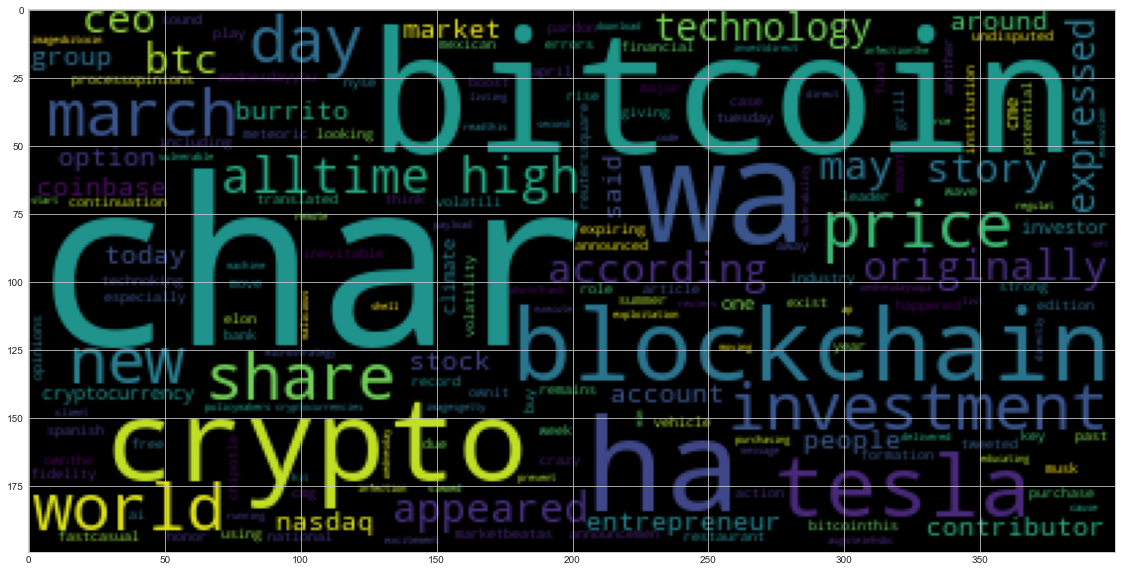

In [109]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

# Process text for wordcloud creation
big_string = ' '.join(bitcoin_sentiment_df['text'])
input_text = process_text(big_string)


# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(input_text)
plt.imshow(img)

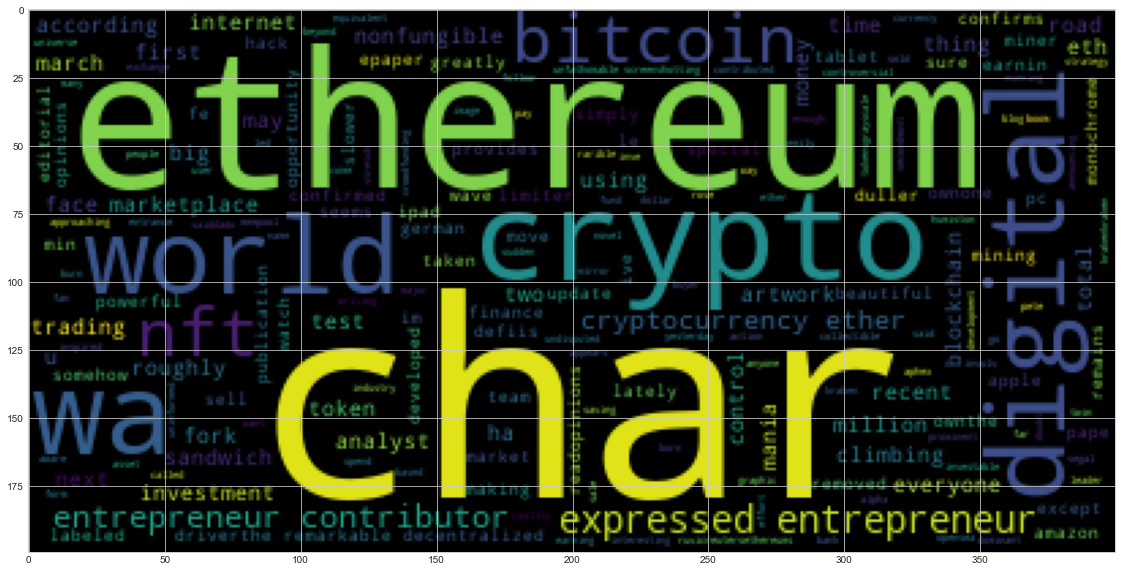

In [108]:
# Generate the Ethereum word cloud
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

# Process text for wordcloud creation
big_string = ' '.join(ethereum_sentiment_df['text'])
input_text = process_text(big_string)


# Generate the Ethereum word cloud
wc = WordCloud()
img = wc.generate(input_text)
plt.imshow(img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [111]:
import spacy
from spacy import displacy

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [110]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

^C


In [112]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [116]:
# Concatenate all of the bitcoin text together
def process_text(doc):
    words = word_tokenize(doc)
    return ' '.join(words)

# Process text for wordcloud creation
big_string = ' '.join(bitcoin_sentiment_df['text'])
bitcoin_text = process_text(big_string)
bitcoin_text

'The inevitable has happened : You can now purchase a Tesla vehicle with Bitcoin . This is according to Tesla CEO , pardon , Technoking Elon Musk , who tweeted it on Wednesday . You can now buy a Tesla … [ +1648 chars ] This story originally appeared on MarketBeatAs crazy as it may sound , especially when looking at Bitcoin ’ s ( BTC ) meteoric rise over the past year , but we think there is a very strong case for Bitcoin… [ +3926 chars ] This article was translated from our Spanish edition using AI technologies . Errors may exist due to this process . Opinions expressed by Entrepreneur contributors are their own . It was the summer of… [ +7537 chars ] Opinions expressed by Entrepreneur contributors are their own . The crypto market moves in waves . Bitcoin remains the undisputed blockchain industry leader , but as the major banks and investment fund… [ +4681 chars ] After another week of bitcoin price volatility , including a new all-time high , a new record of options expiring on Mar

In [117]:
# Run the NER processor on all of the text
BTC_NER = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!

In [118]:
# Render the visualization
displacy.render(BTC_NER, style='ent') 

In [120]:
# List all Entities
entities = [ent.text for ent in bitcoin_text.ents] 

AttributeError: 'str' object has no attribute 'ents'

---

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f